## Student Name:

---

# Tutorial 1 - Part B: Joint, conditional and marginal probability

This notebook serves as a simple demo allowing us to play with the various types of probability we typicaly deal with and visualize the results in cases of independent and dependent variables.

All the parts that require action (either in the code or equations) are flagged by `<your turn>` or $\color{red}{<your~turn>}$

In [11]:
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
from scipy.interpolate import griddata
import matplotlib.pylab as plt

# Setting plot fonts
plt.rc('font', family='serif')

def prob_plotter(probX, probY, probXY, xmin=0, xmax=10, nx=100, ymin=0, ymax=10, ny=100):
    """
    A convenient function to plot the marginal and joint probabilities
    """

    # Part I: calculating values of PDF across the grid:
    test_x = np.linspace(xmin, xmax, nx)
    test_y = np.linspace(ymin, ymax, ny)
    xy_grid = np.meshgrid(test_x,test_y)
    p_xy = probXY(xy_grid[0],xy_grid[1])

    # Part II: making the plot
    fig = plt.figure(figsize=(7,7))
    # Making the marginal y plot
    ax_marginal_y = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=1)
    ax_marginal_y.plot(probY(test_y),test_y)
    ax_marginal_y.set_xlabel('$p(y)$',fontsize=16)
    ax_marginal_y.set_ylabel('$y$',fontsize=16)
    ax_marginal_y.set_ylim(ymin,ymax)
    ax_marginal_y.set_xlim(0)
    ax_marginal_y.minorticks_on()
    ax_marginal_y.tick_params(axis='both', which='major', labelsize=12, length=5)
    ax_marginal_y.tick_params(axis='both', which='minor', length=2.5)
    ax_marginal_y.tick_params(axis='both', which='both', direction='in',right=True,top=True)

    # Making the marginal x plot
    ax_marginal_x = plt.subplot2grid((4,4),(3,1),rowspan=1,colspan=3)
    ax_marginal_x.plot(test_x,probX(test_x))
    ax_marginal_x.set_ylabel('$p(x)$',fontsize=16)
    ax_marginal_x.set_xlabel('$x$',fontsize=16)
    ax_marginal_x.set_xlim(xmin,xmax)
    ax_marginal_x.set_ylim(0)
    ax_marginal_x.minorticks_on()
    ax_marginal_x.tick_params(axis='both', which='major', labelsize=12, length=5)
    ax_marginal_x.tick_params(axis='both', which='minor', length=2.5)
    ax_marginal_x.tick_params(axis='both', which='both', direction='in',right=True,top=True)

    # Making the joint plot
    ax_joint = plt.subplot2grid((4,4),(0,1),rowspan=3,colspan=3)
    xyjoint = ax_joint.imshow(p_xy,origin='lower', cmap='Blues',
                              extent=[xmin,xmax,ymin,ymax])
    ax_joint.set_xlim(xmin,xmax)
    ax_joint.set_ylim(ymin,ymax)
    ax_joint.set_xticklabels([])
    ax_joint.set_yticklabels([])
    ax_joint.minorticks_on()
    ax_joint.tick_params(axis='both', which='both', direction='in',right=True,top=True)

    cbarax = fig.add_axes([0.92, 0.31, 0.02, 0.57])
    plt.colorbar(xyjoint,cax=cbarax)
    cbarax.set_ylabel('$p(x,y)$',fontsize=16)
    return fig

## Independent variables

Let's define x and y as independent random variables with simple PDFs:

### $$ p(x) = \mathcal{N}(x|\mu=5,\sigma=2) $$
### $$ p(y) = \mathcal{G}(y|\alpha=3) $$

Where $\mathcal{G}$ is the [Gamma distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma).
If $x$ and $y$ are independent, modify the following definitions to make a plot of the marginal and joint probabilities.

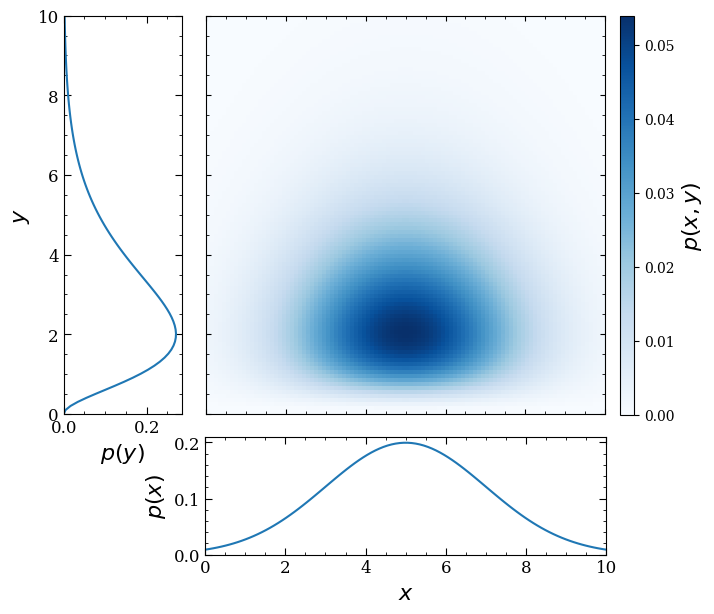

In [14]:
# <your turn>: Modify the definitions of the following functions
def probX(x):
    # <your turn>
    return st.norm.pdf(x, loc=5, scale=2)

def probY(y):
    # <your turn>
    return st.gamma.pdf(y, a=3)

def probXY(x,y):
    # <your turn>
    return probX(x)*probY(y)

prob_plotter(probX,probY,probXY);

## Dependent variables

Let's assume we know $p(x)$ and $p(x,y)$ and numerically estimate $p(y)$

### $$ p(x) = \mathcal{N}(x|\mu=5,\sigma=2) $$
### $$ p(x,y) = p(x)\mathcal{N}(y|\mu=\frac{5x}{y+1},\sigma=1) $$

Come up with a computational expresion for $p(y)$ based on $p(x)$ and $p(x,y)$.

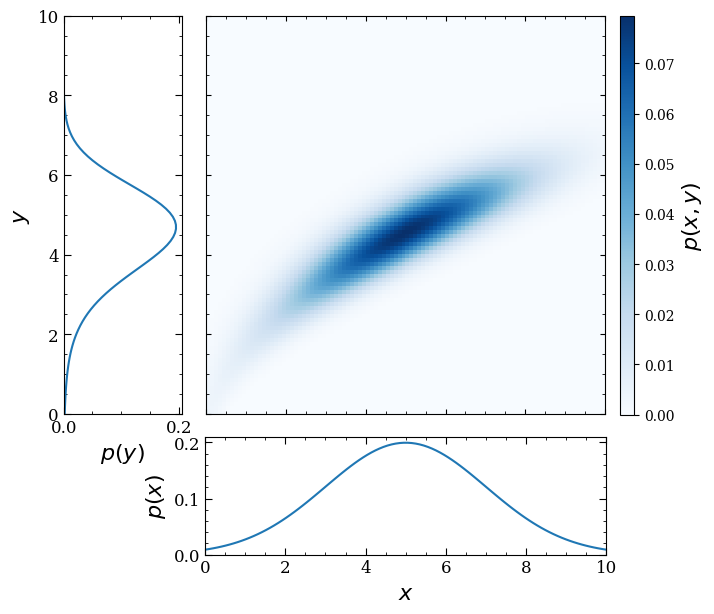

In [18]:
# <your turn>: Modify the definitions of the following functions

def probX(x):
    # <your turn>
    return st.norm.pdf(x, loc=5, scale=2)

def probY_given_X(y, x):
    """
    This is the conditional probability p(y|x)
    """
    return st.norm.pdf(y, loc=(5*x)/(y+1), scale=1)

def probXY(x,y):
    # <your turn>
    return probX(x)*probY_given_X(y,x)

def probY_scalar(y):
    # <your turn>
    # We need to marginalize over x, so we integrate p(x,y) over all x.
    # We use quad for numerical integration.
    return quad(probXY, -np.inf, np.inf, args=(y))[0]

probY = np.vectorize(probY_scalar)

prob_plotter(probX,probY,probXY);

## You can now save the notebook and download it.